Usage of resnet18 for gender identification

    In this section, we are going to use the same training, validation and testing set and just change the model from VGG16 to VGG19 and evaluate the performance

In [1]:
import pandas as pd
import fastai
#from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import matplotlib.pyplot as plt

print(fastai.__version__)
%pylab inline

1.0.61
Populating the interactive namespace from numpy and matplotlib


/Users/vickyyounang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['subplots', 'partition', 'uniform', '__version__', 'copy', 'pad', 'random', 'array']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
help(fastai.datasets.untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False, verbose=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



#### Modeling


In [111]:
# import data
df=pd.read_csv('data/list_attr_celeba.csv')
print(df.shape)

(202599, 41)


In [110]:
import shutil
import os
from os import listdir
from os.path import isfile, join

train_path='./data/resnet/train/'

os.makedirs(train_path)

initial = './data/Celeb_sets/train/'

onlyfiles1 = [f for f in listdir(initial+'female') if isfile(join(initial+'female', f))]
onlyfiles2 = [f for f in listdir(initial+'male') if isfile(join(initial+'male', f))]

#print(len(onlyfiles1),len(onlyfiles2))

for file in onlyfiles1:
    shutil.copy(initial+'female/'+file, train_path+file)
for file in onlyfiles2:
    shutil.copy(initial+'male/'+file, train_path+file)


In [115]:
from os import listdir
from os.path import isfile, join

train_path='./data/resnet/train/'
onlyfiles = [f for f in listdir(train_path) if isfile(join(train_path, f))]

onlygender=[]


#print(df_gender_test)

for file in onlyfiles:
    onlygender.append(df.loc[df['image_id'] == file].Male.item())
    
print(onlygender[:5])

"'\ntrain_path='./data/resnet/train/'\nonlyfiles = [f for f in listdir(train_path) if isfile(join(train_path, f))]\n\nonlygender=[]\n\n\n#print(df_gender_test)\n\nfor file in onlyfiles:\n    onlygender.append(df.loc[df['image_id'] == file].Male.item())\n    \nprint(onlygender[:5])"

In [151]:
print(len(onlygender),len(onlyfiles))


1000 1000


In [118]:
# selecting only 20000 elements
#df = df[0:20000]
#print(df.shape)

#df_gender = df.loc[:,['image_id','Male']]
#df_gender.columns = ['image','gender']
#df_gender.gender = df_gender.gender.apply(lambda x: "male" if x==1 else "female")
#df_gender.image = df_gender.image.apply(lambda x: 'data/img_align_celeba/'+x )
#df_gender.head()
#print(df.shape)
#df_gender.tail(10)

# creating an empty dataframe
df_gender = pd.DataFrame( columns=['image','gender'])
df_gender.gender = ["male" if x==1 else "female" for x in onlygender ] 
df_gender.image = ['/data/resnet/train/'+x  for x in onlyfiles]


df_gender.head()

,image,gender
0,/data/resnet/train/045354.jpg,male
1,/data/resnet/train/003301.jpg,female
2,/data/resnet/train/043725.jpg,male
3,/data/resnet/train/005770.jpg,female
4,/data/resnet/train/015563.jpg,female


,image,gender
0,./data/resnet/train/000001.jpg,female
1,./data/resnet/train/000002.jpg,female
2,./data/resnet/train/000003.jpg,male
3,./data/resnet/train/000004.jpg,female
4,./data/resnet/train/000005.jpg,female


In [119]:
len(df_gender)

32000

In [120]:
from fastai.vision import *

path='.'
bs=64
data = fastai.vision.ImageDataBunch.from_df(path,
                              df_gender, 
                              ds_tfms=get_transforms(), 
                              num_workers=0,
                              size=224, 
                              bs=bs).normalize(imagenet_stats)

In [121]:

#data.show_batch(rows=3)
type(data)
data

ImageDataBunch;

Train: LabelList (25600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
male,female,male,female,female
Path: .;

Valid: LabelList (6400 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
female,male,female,female,female
Path: .;

Test: None

In [122]:
df2=pd.read_csv('data/list_attr_celeba.csv')
df2 = df2.loc[:,['image_id','Male']]


In [123]:
from os import listdir
from os.path import isfile, join

test_path='./data/resnet/test/'
onlyfiles = [f for f in listdir(test_path) if isfile(join(test_path, f))]

onlygender=[]


#print(df_gender_test)

for file in onlyfiles:
    onlygender.append(df2.loc[df2['image_id'] == file].Male.item())
    
print(onlygender[:5])



/Users/vickyyounang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: `item` has been deprecated and will be removed in a future version
  del sys.path[0]


[1, 1, -1, -1, -1]


In [124]:
print(len(onlygender), len(onlyfiles))

# creating an empty dataframe
df_gender_test = pd.DataFrame( columns=['image','gender'])
df_gender_test.gender = ["male" if x==1 else "female" for x in onlygender ] 
df_gender_test.image = ['/data/resnet/test/'+x  for x in onlyfiles]


df_gender_test.head()

1000 1000


,image,gender
0,/data/resnet/test/201579.jpg,male
1,/data/resnet/test/202070.jpg,male
2,/data/resnet/test/202064.jpg,female
3,/data/resnet/test/202058.jpg,female
4,/data/resnet/test/201960.jpg,female


In [125]:
#test_data = ImageList.from_csv(path="./data/train",csv_name="../sample_submission.csv",header="infer")
#data = ImageDataBunch.from_csv(path="./data/",folder="train",csv_labels="./train.csv",ds_tfms=get_transforms()

test_data = ImageList.from_df(df_gender_test, path=path)

data.add_test(test_data)

In [126]:
data

ImageDataBunch;

Train: LabelList (25600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
male,female,male,female,female
Path: .;

Valid: LabelList (6400 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
female,male,female,female,female
Path: .;

Test: LabelList (1000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: .

In [8]:
print(data.device.type)
print(data.classes)

cpu
['female', 'male']


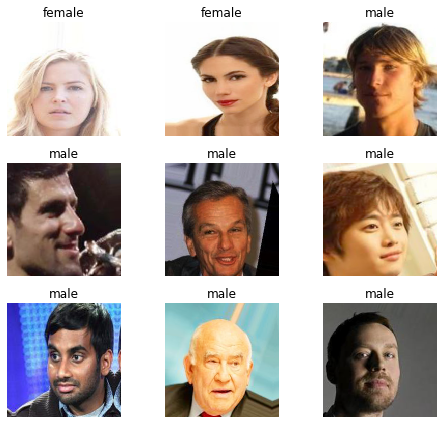

In [127]:
#fastai models
#dir(fastai.vision.models)
data.show_batch(rows=3, figsize=(7,6))

Training the Neural Network model¶
We will use the built-in cnn learner module from the fastai library. It creates a convolutional neural network.

In [128]:

#learner = cnn_learner(data, models.resnet18, metrics=[error_rate, accuracy])
#learner

#trying another learner

model= fastai.vision.models.resnet18()

if data.device.type == 'cpu':
    #learn = fastai.basic_train.Learner(data, model, metrics=[error_rate, accuracy])
    learn = cnn_learner(data, models.resnet18, metrics=[error_rate,accuracy])
#else: # GPU:
    #learn = fastai.basic_train.Learner(data, model , metrics=fastai.metrics.accuracy).to_fp16()


In [129]:
#learn

#trying to train with one cycle
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.246579,0.179992,0.072187,0.927813,1:12:31
1,0.178887,0.127151,0.050000,0.950000,1:37:14
2,0.137695,0.103923,0.042031,0.957969,1:07:17
3,0.136181,0.100696,0.040000,0.960000,1:01:41


In [130]:
os.getcwd()

'/Users/vickyyounang/Documents/PHD/winter2021/deep_learning/project_&_topic/Project/code'

In [131]:
# let's save the model
learn.save('resnet-18-4_model')



Interpreting Results

Fastai comes with a classification Interpretation module which evalues any learner on the vlidation set and generate different insights

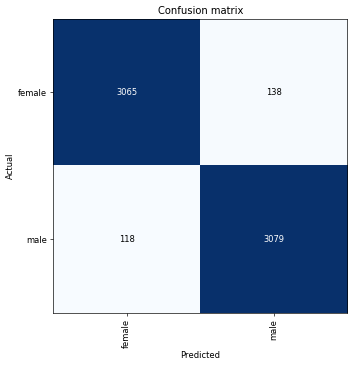

In [132]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6),dpi=60)

Fine-Tuning The Learned Model
It worked pretty good but we can do better. So far our model was pretrained and frozen. Which means that all the layers of the Resnet-18 model were not being updated while we trained our model above and only the last layer was updating. The idea is that the lower level layers are basically acting as feature detectors which are then being used to train the final fully connected layer. We didn't want to update our feature detectors.

Since our final layer is trained pretty well. Lets try to fine-tune the previous layers as well. For this, we cant use the same learning rate as before since it will juse change the weights of our lower layers so fast that the basic feature detectors won't work well anymore.

In order to find the optimal learning rate, lets call the lr_find() method of the learner

In [133]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


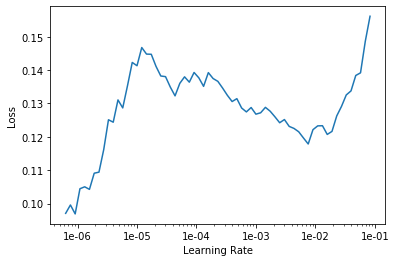

In [134]:
learn.recorder.plot()

In the above model, observe the the minima before the loss starts exploding and look the learning rate where loss starts decreasing for this minima. We'll be training the initial layers of the CNN model with smaller learning rate and the later layers with the larger learning rate. In Fastai, this can be done as,

In [135]:
len(learn.layer_groups)

3

In [20]:
#learn = cnn_learner(data, models.resnet18, metrics=[error_rate,accuracy])
#learn = fastai.basic_train.Learner(data, model, metrics=[error_rate, accuracy])
#saved_model = learn.load('resnet-18-4_model')
#saved_model.layer_groups = learn.layer_groups
#len(learn.layer_groups)

In [136]:
learn.fit_one_cycle(2 ,max_lr=slice(1e-4 / 2 , 1e-2 / 2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.164641,0.104928,0.041250,0.958750,1:01:02
1,0.122566,0.092015,0.037344,0.962656,1:00:54


In [137]:
learn.save('resnet-18-finetune-6')

Interpreting the results

In [139]:
interp_ft = ClassificationInterpretation.from_learner(learn)


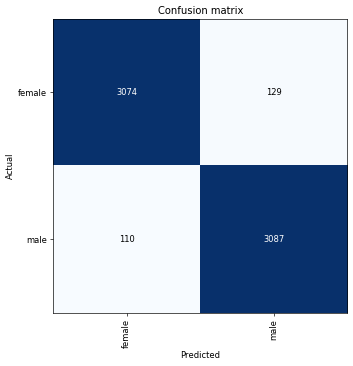

In [140]:
interp_ft.plot_confusion_matrix(dpi=60, figsize=(6,6))

Let's see some wrong predictions

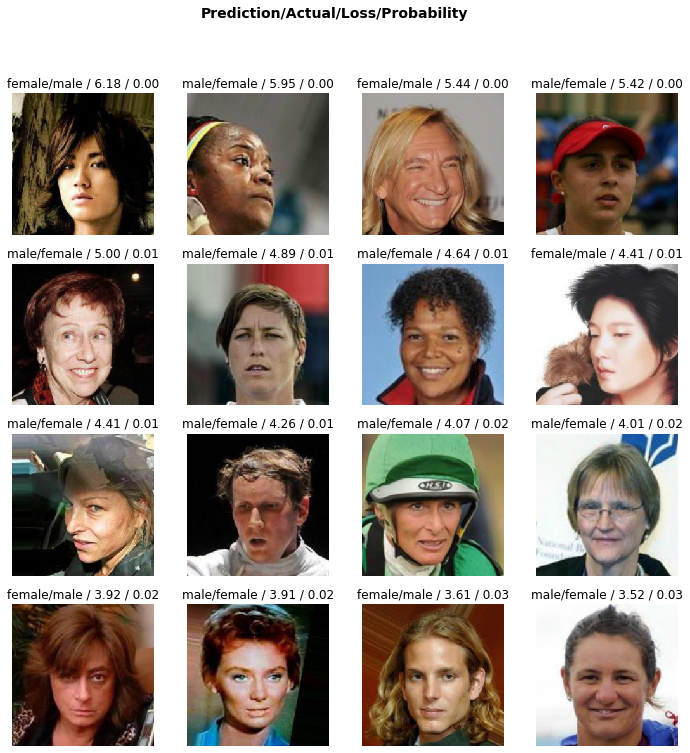

In [141]:
interp.plot_top_losses(k=16, heatmap=False)

In [142]:
# TRYING TO TEST THE MODEL ON THE TESTING SET
# what is inside learn, the finetune?
# to see the overall performance of the model
learn.validate()

[0.09201498, tensor(0.0373), tensor(0.9627)]

In [153]:
# 49% accuracy, too small, let's try to do a imageBunch

data_test = fastai.vision.ImageDataBunch.from_df(path,
                              df_gender_test, 
                              ds_tfms=get_transforms(), 
                              num_workers=0,
                              size=224, 
                              bs=bs).normalize(imagenet_stats)

data_test

ImageDataBunch;

Train: LabelList (800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
male,female,female,female,female
Path: .;

Valid: LabelList (200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
male,male,female,female,female
Path: .;

Test: None

In [155]:
learn.data.train_dl = data_test.train_dl

learn.validate(dl = learn.data.train_dl)

[0.08584514, tensor(0.0299), tensor(0.9701)]

In [144]:
# on the training set to see
learn.validate(dl = learn.data.train_dl )

[0.093825266, tensor(0.0368), tensor(0.9632)]

In [145]:
# on the children set, let's create their dataframe:

files_ = ['f_img_1.jpg', 'f_img_2.jpg', 'f_img_3.jpg', 'f_img_4.jpg', 'f_img_5.jpg', 'img_1.jpg', 'img_2.jpg', 'img_3.jpg', 'img_4.jpg', 'img_5.jpg']
gender= ['female', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male']
files = ['./data/resnet/test-me/'+x for x in files_ ]



In [146]:
# creating an empty dataframe
df_gender_child = pd.DataFrame( columns=['image','gender'])
df_gender_child.gender = gender 
df_gender_child.image = files


df_gender_child.head()


,image,gender
0,./data/resnet/test-me/f_img_1.jpg,female
1,./data/resnet/test-me/f_img_2.jpg,female
2,./data/resnet/test-me/f_img_3.jpg,female
3,./data/resnet/test-me/f_img_4.jpg,female
4,./data/resnet/test-me/f_img_5.jpg,female


In [160]:
test_data = ImageList.from_df(df_gender_child, path=path)

data_test_ch = fastai.vision.ImageDataBunch.from_df(path,
                              df_gender_child, 
                              ds_tfms=get_transforms(), 
                              num_workers=0,
                              size=224, 
                              bs=bs).normalize(imagenet_stats)

data_test_ch


You can deactivate this warning by passing `no_check=True`.


/Users/vickyyounang/opt/anaconda3/lib/python3.7/site-packages/fastai/basic_data.py:248: UserWarning: Your training dataloader is empty, you have only 8 items in your training set.
                 Your batch size is 64, you should lower it.
  Your batch size is {self.train_dl.batch_size}, you should lower it.""")


ImageDataBunch;

Train: LabelList (8 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
female,female,female,female,male
Path: .;

Valid: LabelList (2 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
female,male
Path: .;

Test: None

In [187]:
#learn.data.train_dl = data_test_ch.train_dl
#learn.data.train_dl
#learn.validate(dl = learn.data.train_dl)

In [192]:
# model performance on the test set only:
#learn.validate(dl = learn.data.test_dl)

In [188]:
# predict on the resnet model for the test set
# initial resnet, not the fine tuned:

learn = cnn_learner(data, models.resnet18, metrics=[error_rate, accuracy])
learn.load("resnet-18-4_model")

#learn = load_learner('./models/','resnet-18-4_model.pth')

learn.validate()

[0.10069591, tensor(0.0400), tensor(0.9600)]

In [190]:
learn.data.train_dl = data_test.train_dl

learn.validate(dl = learn.data.train_dl)

[0.092581235, tensor(0.0391), tensor(0.9609)]

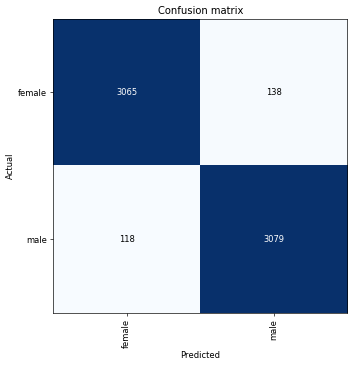

In [194]:
interp_ft = ClassificationInterpretation.from_learner(learn)
interp_ft.plot_confusion_matrix(dpi=60, figsize=(6,6))